In [1]:
# import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
sns.set()

ModuleNotFoundError: No module named 'seaborn'

In [3]:
# read the data
data = pd.read_csv(
    "https://github.com/Shreyas3108/Weather/raw/master/weather.csv")

In [5]:
# chech the head of the data
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
5,11/6/2007,Canberra,6.2,16.9,0.0,5.8,8.2,SE,44.0,SE,...,57,1023.8,1021.7,7,5,10.9,14.8,No,0.2,No
6,11/7/2007,Canberra,6.1,18.2,0.2,4.2,8.4,SE,43.0,SE,...,47,1024.6,1022.2,4,6,12.4,17.3,No,0.0,No
7,11/8/2007,Canberra,8.3,17.0,0.0,5.6,4.6,E,41.0,SE,...,57,1026.2,1024.2,6,7,12.1,15.5,No,0.0,No
8,11/9/2007,Canberra,8.8,19.5,0.0,4.0,4.1,S,48.0,E,...,48,1026.1,1022.7,7,7,14.1,18.9,No,16.2,Yes
9,11/10/2007,Canberra,8.4,22.8,16.2,5.4,7.7,E,31.0,S,...,32,1024.1,1020.7,7,1,13.3,21.7,Yes,0.0,No


In [9]:
# check the columns of the data--the attributes of this data
data.columns
len(data.columns)

24

In [8]:
# check the shape of the data
# meaning this data have 366 items in it with 24 attributes
data.shape

(366, 24)

In [10]:
# check the null datas and sum it
data.isnull().sum()

Date              0
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [11]:
# drop null datas
data = data.dropna()

In [12]:
# check again if all null has been removed
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [13]:
# check the attributes of the data by describing it
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,7.742988,20.897561,1.440854,4.702439,8.014939,40.396341,10.414634,18.185976,71.100610,44.003049,1019.350000,1016.530793,3.905488,4.000000,12.815549,19.556402,1.422561
std,5.945199,6.707310,4.289427,2.681183,3.506646,13.132176,7.811544,8.926759,12.983367,16.605975,6.715244,6.469774,2.974957,2.652101,5.542521,6.644311,4.234023
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,2.000000,4.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.850000,15.500000,0.000000,2.550000,6.000000,31.000000,6.000000,11.000000,63.000000,32.000000,1014.800000,1012.400000,1.000000,1.000000,8.175000,14.500000,0.000000
50%,7.900000,20.400000,0.000000,4.400000,8.750000,39.000000,7.000000,17.000000,71.000000,42.500000,1019.750000,1016.900000,4.000000,4.000000,13.500000,18.850000,0.000000
75%,12.800000,25.800000,0.200000,6.600000,10.700000,46.000000,13.000000,24.000000,80.000000,54.000000,1024.300000,1021.125000,7.000000,7.000000,17.200000,24.225000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,93.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [14]:
# check the columns of the remaining data
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [15]:
# count the value of RainToday Feature
data.RainToday.value_counts()

No     267
Yes     61
Name: RainToday, dtype: int64

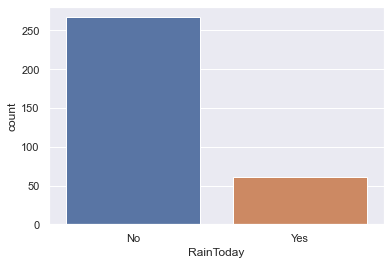

In [16]:
# plot of a graph
graph = sns.countplot(x='RainToday', data=data)

/Users/olalekantaofeek/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


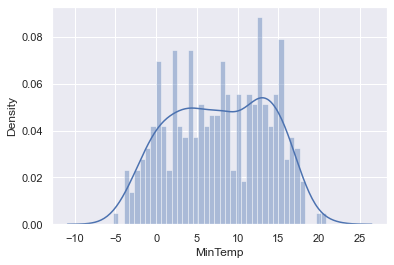

In [17]:
# distribution plot of minTemp
graph = sns.distplot(data['MinTemp'], bins=40)

/Users/olalekantaofeek/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


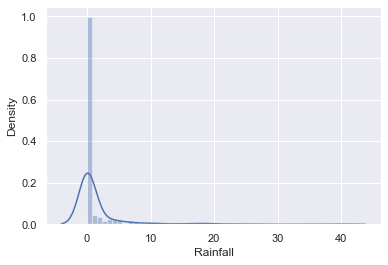

In [18]:
# distribution plot of rainfall
graph = sns.distplot(data['Rainfall'])

In [19]:
# check the columns again
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [20]:
# data conversions
data['RainToday'] = data['RainToday'].apply(lambda x: 1 if x == "Yes" else 0)

train = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
              'WindDir3pm', 'WindSpeed3pm', 'Humidity3pm', 'Pressure3pm', 'Cloud3pm', 'Temp3pm', 'RainToday', 'RISK_MM']]

data['RainTomorrow'] = data['RainTomorrow'].apply(
    lambda x: 1 if x == "Yes" else 0)

label = data['RainTomorrow']

In [21]:
# check the data type of train data
train.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir3pm        object
WindSpeed3pm       int64
Humidity3pm        int64
Pressure3pm      float64
Cloud3pm           int64
Temp3pm          float64
RainToday          int64
RISK_MM          float64
dtype: object

In [22]:
# get dummy of the input data
train = pd.get_dummies(train, columns=['WindGustDir', 'WindDir3pm'])

In [23]:
# check the data type pf train data after apply dummy
train.dtypes

MinTemp            float64
MaxTemp            float64
Rainfall           float64
Evaporation        float64
Sunshine           float64
WindGustSpeed      float64
WindSpeed3pm         int64
Humidity3pm          int64
Pressure3pm        float64
Cloud3pm             int64
Temp3pm            float64
RainToday            int64
RISK_MM            float64
WindGustDir_E        uint8
WindGustDir_ENE      uint8
WindGustDir_ESE      uint8
WindGustDir_N        uint8
WindGustDir_NE       uint8
WindGustDir_NNE      uint8
WindGustDir_NNW      uint8
WindGustDir_NW       uint8
WindGustDir_S        uint8
WindGustDir_SE       uint8
WindGustDir_SSE      uint8
WindGustDir_SSW      uint8
WindGustDir_SW       uint8
WindGustDir_W        uint8
WindGustDir_WNW      uint8
WindGustDir_WSW      uint8
WindDir3pm_E         uint8
WindDir3pm_ENE       uint8
WindDir3pm_ESE       uint8
WindDir3pm_N         uint8
WindDir3pm_NE        uint8
WindDir3pm_NNE       uint8
WindDir3pm_NNW       uint8
WindDir3pm_NW        uint8
W

In [24]:
# split the data to train and test
x_train, y_train, x_test, y_test = train_test_split(
    train, label, test_size=0.6)

In [25]:
# Instantiate the Logisticregression
model1 = LogisticRegression()

In [26]:
# train with LogReg
model1.fit(x_train, x_test)

/Users/olalekantaofeek/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
# check the score
accuracy_score(y_test, model1.predict(y_train))*100

97.96954314720813

In [28]:
# confusion matrix
confusion_matrix(y_test, model1.predict(y_train))

array([[162,   2],
       [  2,  31]])

In [29]:
# Instantiate Decision tree
model2 = DecisionTreeClassifier()

In [30]:
# train with decisiontree
model2.fit(x_train, x_test)

DecisionTreeClassifier()

In [31]:
# check the decision tree accuracy score
accuracy_score(y_test, model2.predict(y_train))*100

100.0

In [32]:
# Instantiate Random ForestClassifier
model3 = RandomForestClassifier()

In [33]:
# train with RandomForestClassifier
model3.fit(x_train, x_test)

RandomForestClassifier()

In [34]:
# check randomForest score
accuracy_score(y_test, model3.predict(y_train))*100

100.0